## 1. 전복 데이터를 가지고 머신러닝 5가지 분류를 수행 (SVM, LR, RF, DT, KNN)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../abalone.csv", index_col=None)
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Text(0.5, 1.0, 'Rings')

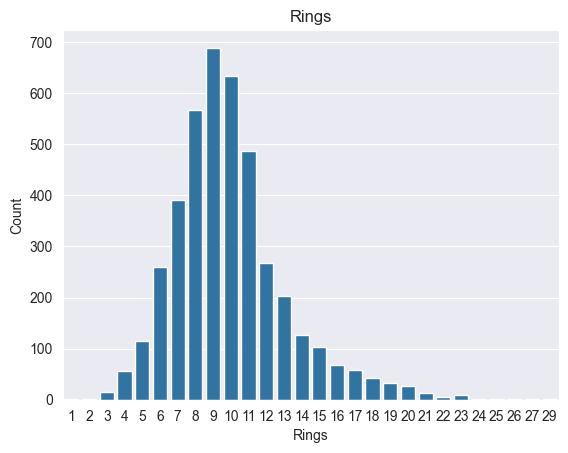

In [3]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings")

In [4]:
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [5]:
# 결측치 확인
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

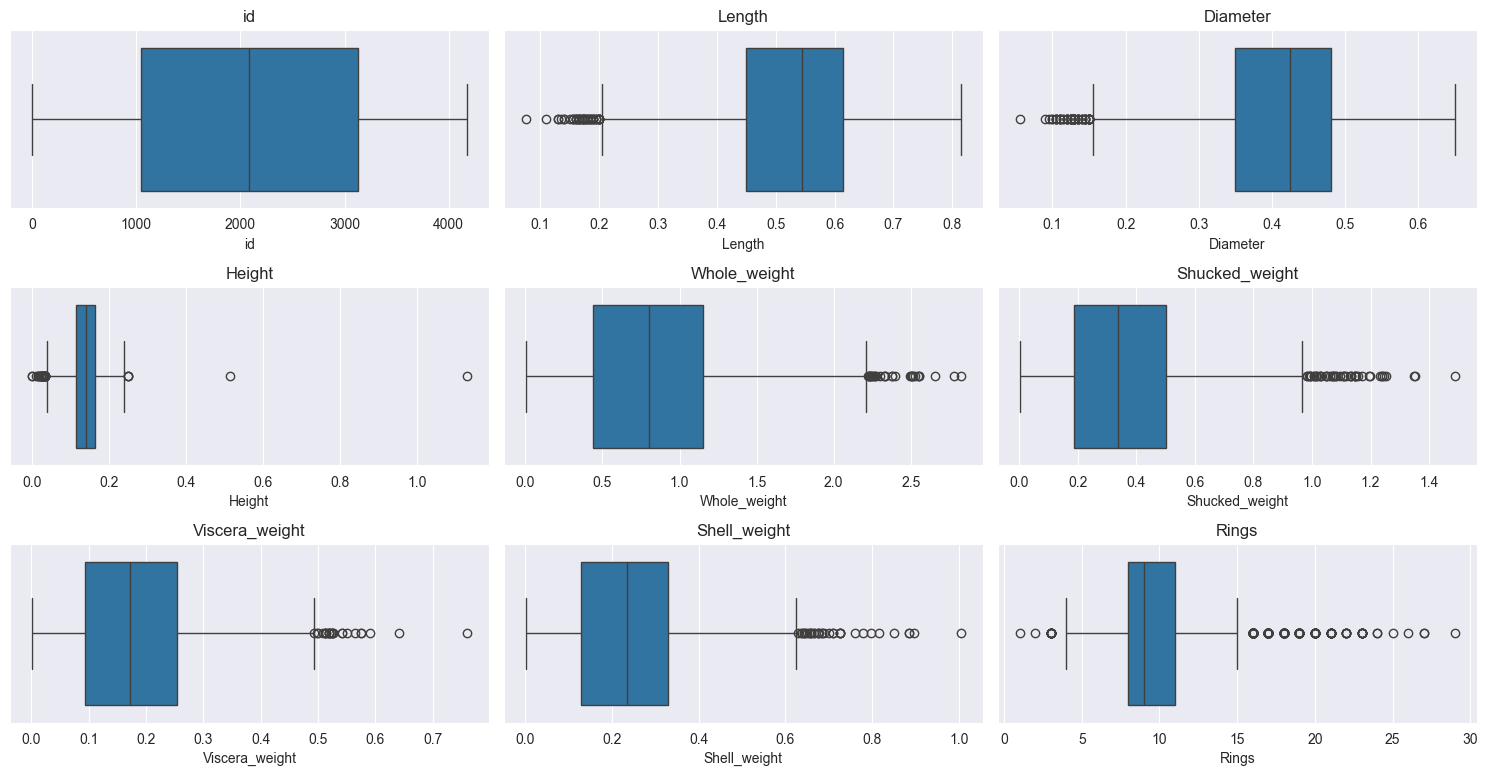

In [6]:
# 데이터프레임의 수치형 칼럼들을 선택
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 박스플롯을 각 수치형 칼럼에 대해 반복적으로 그리기
plt.figure(figsize=(15, 10))  # 적절한 사이즈로 설정
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.boxplot(x=column, data=df)
    plt.title(column)

plt.tight_layout()  # 레이아웃 조정
plt.show()

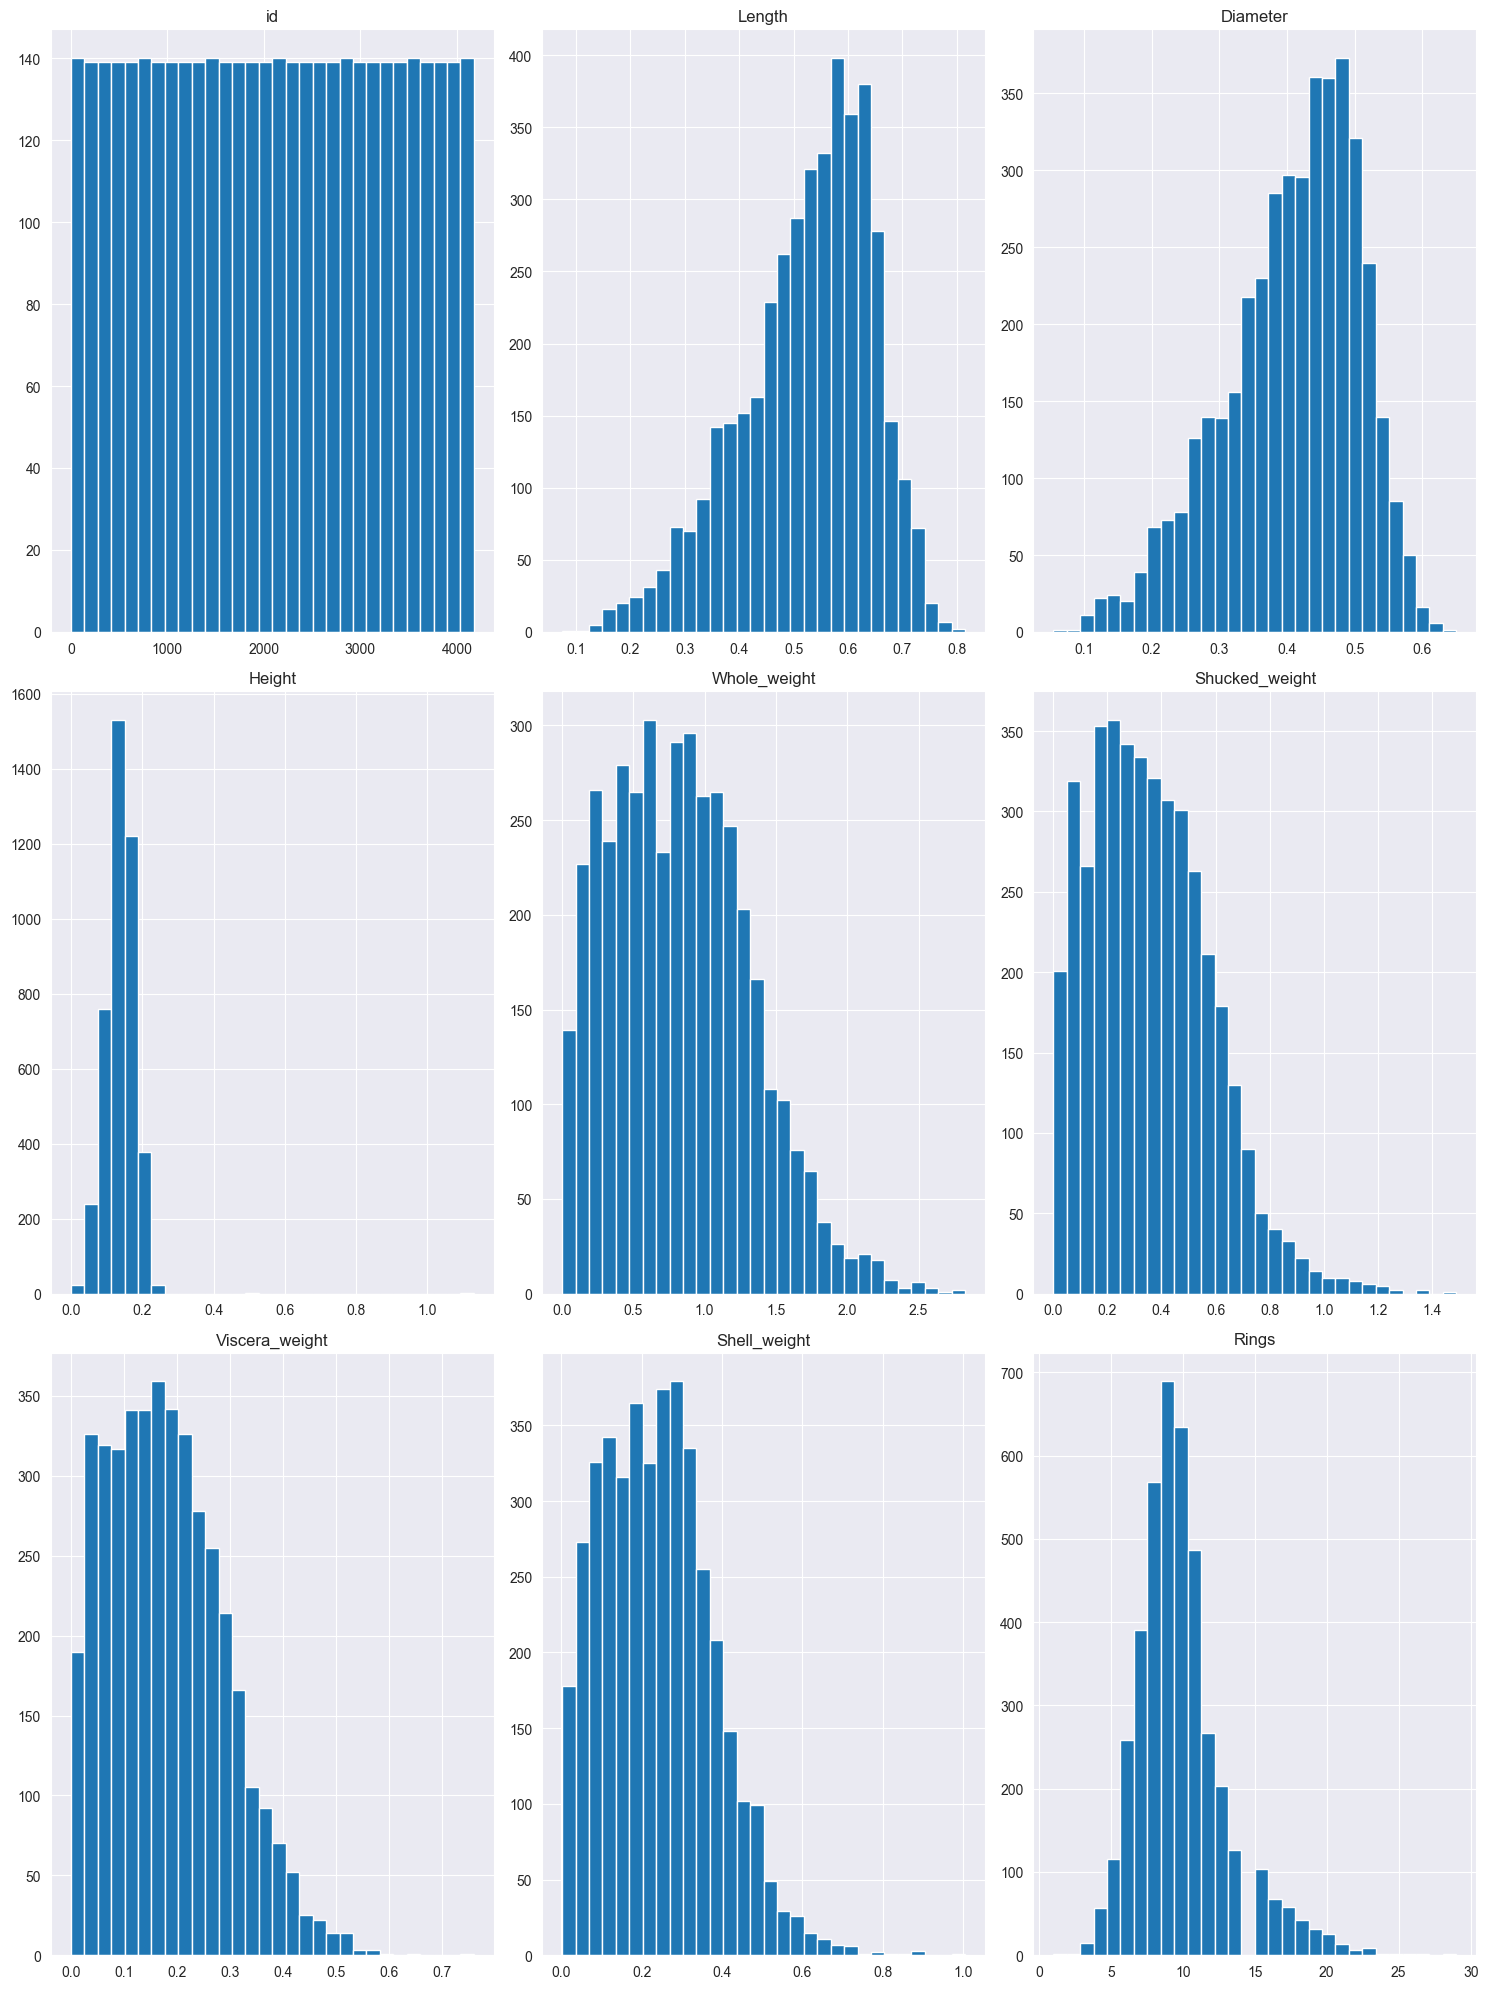

In [7]:
# 각 컬럼별 히스토그램을 그리는 코드
df.hist(figsize=(15, 20), bins=30)  # ax 인수 없이 자동으로 서브플롯 생성
plt.tight_layout()  # 서브플롯 간격을 자동으로 조정
plt.show()

In [8]:
X=df.drop('Rings',axis=1)
X.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [9]:
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X.head()

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,True
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,True
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,False
3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,True
4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,True,False


In [10]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [13]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train_scaled, y_train)

pred_svm = clf_svm.predict(X_test_scaled)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.2660287081339713
[[ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  8  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  8 17  7  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3 18 32  2  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 13 51 15 26  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 22 40 60 13  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  7 15 84 42  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  6 59 50 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  3 40 48 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  2 27 44 16  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 10 27 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  1 10 16  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3 16  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  

In [14]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0, max_iter=1000)
# 수렴하지 않을 경우, 기본값 iter(=100)을 늘려주면 된다.
clf_lr.fit(X_train_scaled, y_train)

pred_lr = clf_lr.predict(X_test_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.25933014354066986
[[ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  8  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  9 18  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  3 23 25  7  2  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 16 45 31 18  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6 13 58 49 12  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11 28 67 41  4  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8 19 46 43 22  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  5 11 34 46 21  0  2  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  5 27 32 20  0  2  0  1  3  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  8 19 17  0  0  1  2  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  5 18  2  0  2  0  2  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2 13  4  0  2  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0

In [15]:
clf_nn = MLPClassifier(random_state=0,max_iter=1000)
clf_nn.fit(X_train_scaled, y_train)

pred_nn = clf_nn.predict(X_test_scaled)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.2669856459330144
[[ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  7  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  9  5 18  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  5 27 22  3  3  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  4 28 44 22 12  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  5 23 47 45 13  3  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11 31 63 31  9  3  1  2  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  8 13 39 39 25  3  4  1  3  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  7  4 28 42 31  0  6  0  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  4 21 23 19  4  8  3  2  5  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  4  9 17  5  4  1  1  3  1  3  1  0  0  0  1  0  0]
 [ 0  0  0  0  1  1  2 10  5  2  2  4  0  2  0  0  1  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  4  2  2  4  5  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0

In [16]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train_scaled, y_train)

pred_dt = clf_dt.predict(X_test_scaled)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.22009569377990432
[[ 0  4  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  5  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  7 10 17  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  8 19 18  9  4  3  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  2 25 28 31 12  8  4  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10 26 48 24 15  6  3  2  3  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 10 26 40 31 23 10  4  3  1  0  1  0  2  0  0  0  0  0  0  0]
 [ 0  1  0  0  3 17 29 39 22 13  4  3  3  4  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  3 10 27 24 20 10 11  8  5  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4  6  6 18 20 10  8  5  2  5  1  3  2  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  2  4  4 11  6  6  8  2  2  2  2  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  2  1  5  2  4  2  3  5  1  0  1  1  0  4  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  1  1  5  4  2  3  1  1  1

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train_scaled, y_train)
pred = rf_clf.predict(X_test_scaled)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.23636363636363636
[[ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  5  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8 14 13  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  8 23 21  8  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 25 33 34 13  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  3 28 49 34 18  2  1  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 39 43 42 12  4  1  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2 14 39 38 25  6  7  1  1  3  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  4  9 28 36 29  3  6  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  3 19 24 23  6  8  3  1  2  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  6 10 16  6  3  1  1  3  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  7  9  1  2  2  1  0  1  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  6  6  3  2  1  0  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  1

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 모델 리스트 생성
model = []

# 모델을 5번 생성 및 학습
for i in range(5):
    model.append(KNeighborsClassifier(n_neighbors=6))
    model[i].fit(X_train_scaled, y_train)  # X_train과 y_train에서 인덱스를 빼야 함

# 예측값 저장 및 평가
knn_preds = []
for i in range(5):
    knn_preds.append(model[i].predict(X_test_scaled))  # X_test도 인덱스 없이 사용
    print(f"Model {i+1}:")
    print("Accuracy:", accuracy_score(y_test, knn_preds[i]))
    print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds[i]))
    print("\n")

Model 1:
Accuracy: 0.22679425837320574
Confusion Matrix:
 [[ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  4  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12 10 13  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 11 21 22  4  3  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 38 30 23 13  5  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  7 26 51 37 12  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 11 40 46 34 10  3  2  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  4 19 42 37 19  7  4  3  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  8 12 36 33 22  4  3  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  9 22 30 15  5  5  0  2  1  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  1  7 10  9  9  5  3  1  2  1  1  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  2  4 13  8  0  2  2  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  4  5  3  1  4  1  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  